In [ ]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = yf.download('NFLX', start='2022-01-01', end='2025-09-28')

assert df is not None

/var/folders/nl/1zt_x2492zq3mm3dtgmv97k00000gn/T/ipykernel_59073/2146523238.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('NFLX', start='2022-01-01', end='2025-09-28')
[*********************100%***********************]  1 of 1 completed


In [24]:
assert df is not None

ma_window = 20

# Make a moving average window of 20 days and fill in nan values
df['ma_20'] = df['Close']['NFLX'].rolling(ma_window).mean()
df['ma_20'] = df['ma_20'].fillna(df['Close']['NFLX'].mean())

# get difference
df["diff"] = df["Close"]['NFLX'] - df["ma_20"]

df['signal'] = np.where(df["diff"] > 0, -1, 1)


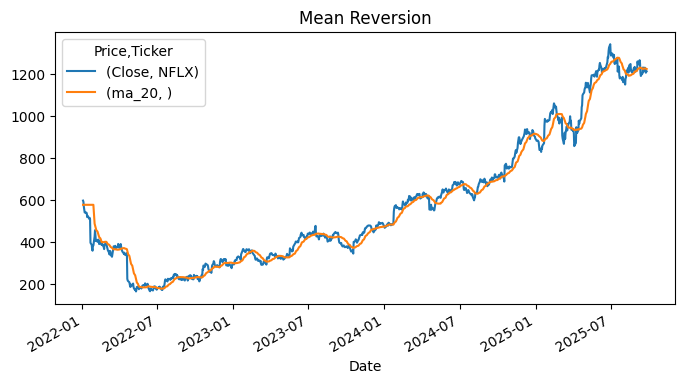

In [26]:
assert df is not None
figs=(8,4)

df[['Close',"ma_20"]].plot(figsize=figs)

plt.title("Mean Reversion")
plt.show()


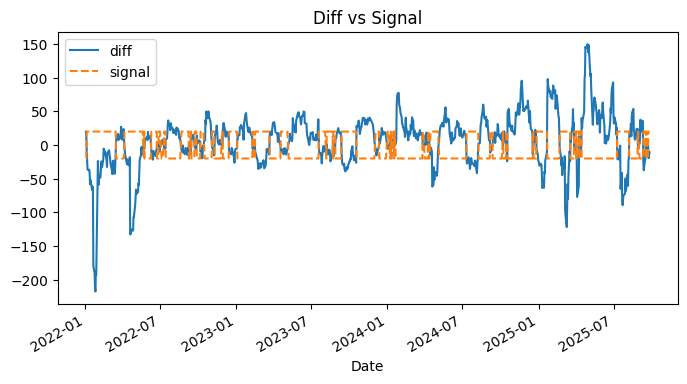

In [29]:
assert df is not None

df['diff'].plot(figsize=figs)
#I multiplied the signal by 20 be able to show it clearly in the graph
(20*df['signal']).plot(figsize=figs, linestyle='--')
plt.title("Diff vs Signal")
plt.legend()
plt.show()


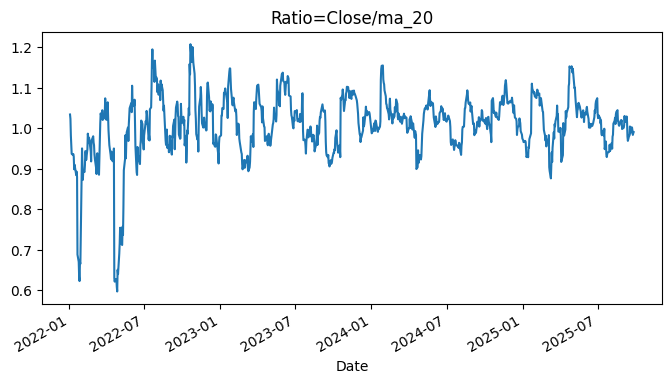

In [ ]:
assert df is not None



(df["Close"]["NFLX"]/df["ma_20"] ).plot(figsize=figs)
plt.title("Ratio=Close/ma_20")
plt.show()